In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [164]:
class HomogeneousPoissonProcess:
    def __init__(self, rate):
        self.rate = rate

    def simulate(self, T):
        t = 0
        events = []
        while t < T:
            t += np.random.exponential(1/self.rate)
            if t < T:
                events.append(t)
        return events
    
class InhomogeneousPoissonProcess:
    def __init__(self, rate_function, rate_majorant):
        self.rate_function = rate_function
        self.rate_majorant = rate_majorant

    def simulate(self, T):
        t_homo = 0
        events = []
        while t_homo < T:
            e = np.random.exponential(1/self.rate_majorant)
            t_homo += e
            u = np.random.rand()
            ratio = self.rate_function(t_homo)/self.rate_majorant
            if u < ratio:
                events.append(t_homo)
        return events
    

class HawkesProcess:
    def __init__(self, mu, alpha, beta):
        self.mu = mu
        self.alpha = alpha
        self.beta = beta

    def get_rate(self, events, t):
        return self.mu + self.alpha * (np.exp(-self.beta*(t-events))*(t>events)).sum()

    def simulate(self, T):
        t = 0
        events = np.array([])
        while t < T:
            lambda_bar = self.get_rate(events, t)
            e = np.random.exponential(1/lambda_bar)
            t += e
            u = np.random.rand()
            ratio = self.get_rate(events, t) / lambda_bar
            if u < ratio:
                events = np.append(events, t)
        return events

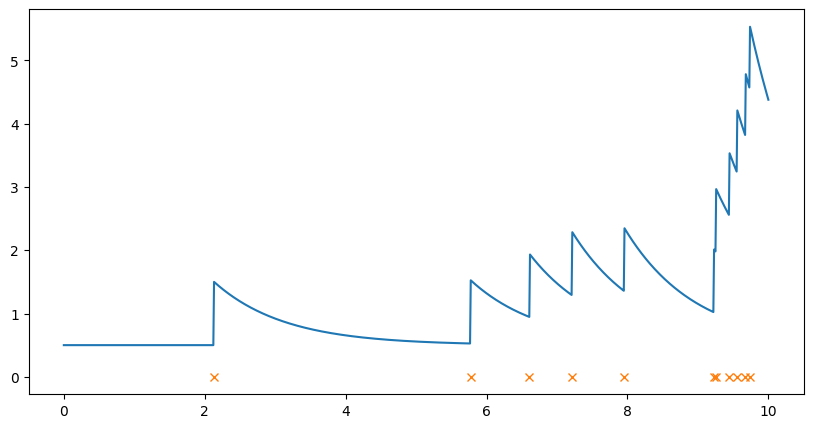

In [170]:
mu, alpha, beta = 0.5, 1, 1
hwk = HawkesProcess(mu, alpha, beta)
T = 10
events = hwk.simulate(T)

intensity_function = lambda t: hwk.get_rate(events, t)
time = np.linspace(0, T, 1000)
intensity = [intensity_function(t) for t in time]
plt.figure(figsize=(10, 5))
plt.plot(time, intensity)
plt.plot(events, np.zeros(len(events)), marker='x', ls="")
plt.show()

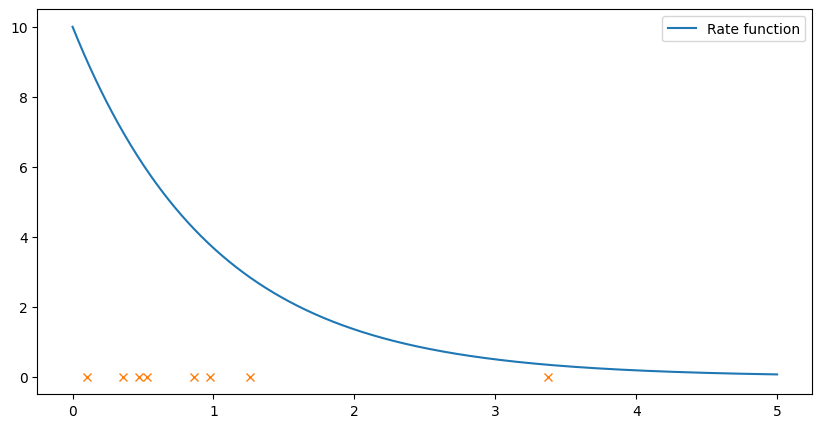

In [139]:
rate_function = lambda t: 10*np.exp(-t)
rate = 10
pp = InhomogeneousPoissonProcess(rate_function, rate)
T = 5
events = pp.simulate(T)

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, T, 1000), rate_function(np.linspace(0, T, 1000)), label='Rate function')
plt.plot(events, np.zeros(len(events)), marker='x', ls="")
plt.legend()
plt.show()